<a href="https://colab.research.google.com/github/LucianaAngrisano/TriagemProcessual/blob/main/AU_organiza%C3%A7%C3%A3o_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEITURA DOS ARQUIVOS E ORGANIZAÇÃO DO DATASET


In [ ]:
# Importação da biblioteca pandas
import pandas as pd

### ABERTURA DO ARQUIVO CONTENDO O TEOR DAS PETIÇÕES

In [ ]:
# Montar o Google Drive para acessar pelo Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salva em uma variável o caminho para a pasta do projeto
from pathlib import Path
pasta_projeto = Path('drive/MyDrive/Colab Notebooks/Projeto')

In [ ]:
# Cria um dataframe a partir do arquivo com o teor das petições
df_peticoes = pd.read_parquet(pasta_projeto / 'AU peticoes.parquet')

In [ ]:
# Verifica o formato e as primeiras linhas do dataframe com o teor das petições
print(df_peticoes.shape)
df_peticoes.head()

(14996, 2)


,processo,peticao
0,0003469-67.2017.4.01.3824,Petição segue anexa.\n \nNum. 751512049 - Pág....
1,0009254-20.2010.4.01.3803,9254-20.2010.4.01.3803 \nEXMO (A) SR (A) JUIZ ...
2,0016750-94.2019.4.01.3800,Dados sobre a doença e medicamento(s)/exame(s)...
3,1000001-11.2021.4.01.3801,inicial\n \nNum. 409309388 - Pág. 1Assinado el...
4,1000001-42.2021.4.01.3823,INICIAL\n \nNum. 409362388 - Pág. 1Assinado el...


In [ ]:
# Retira a pontuação dos números dos processos e exibe o resultado nas primeiras linhas
df_peticoes['processo'] = df_peticoes['processo'].str.replace('[-.]', '', regex=True)
df_peticoes.head()

,processo,peticao
0,00034696720174013824,Petição segue anexa.\n \nNum. 751512049 - Pág....
1,00092542020104013803,9254-20.2010.4.01.3803 \nEXMO (A) SR (A) JUIZ ...
2,00167509420194013800,Dados sobre a doença e medicamento(s)/exame(s)...
3,10000011120214013801,inicial\n \nNum. 409309388 - Pág. 1Assinado el...
4,10000014220214013823,INICIAL\n \nNum. 409362388 - Pág. 1Assinado el...


In [ ]:
# Verifica a existência de números repetidos
sum(df_peticoes['processo'].value_counts() > 1)

0

### ABERTURA DO ARQUIVO CONTENDO OS DADOS DOS PROCESSOS

In [ ]:
# Cria dataframe a partir do arquivo com os dados dos processos
df_dados_processos = pd.read_csv(pasta_projeto / 'AU dados.csv')

In [ ]:
# Verifica o formato e as primeiras linhas do dataframe com os dados dos processos
print(df_dados_processos.shape)
df_dados_processos.head()

(17019, 11)


,Numero,Tipo_Assunto_Nome,Setor_Nome,Setor_Sigla,Unidade_UF,Unidade_Municipio,Pasta_Meio,Classe_Processo_Nome,Tribunal_Competencia,Tribunal_Sigla,Processo_Judicial_Eletronico
0,10126865320214013800,MULTAS E DEMAIS SANÇÕES,COORDENAÇÃO REGIONAL DE RECUPERAÇÃO DE ATIVOS ...,CORAT1R,DF,BRASÍLIA,ELETRÔNICO,NaN,Justiça Federal Comum,TRF1,True
1,10005025620214013803,AVERBAÇÃO / CONTAGEM DE TEMPO ESPECIAL,COORDENAÇÃO REGIONAL DE SERVIDORES CIVIS (PRU1...,CORESE1R,DF,BRASÍLIA,ELETRÔNICO,AÇÃO CIVIL COLETIVA,Justiça Federal Comum,TRF1,True
2,10093425520214013803,APOSENTADORIA,COORDENAÇÃO REGIONAL DE SERVIDORES CIVIS (PRU1...,CORESE1R,DF,BRASÍLIA,ELETRÔNICO,AÇÃO CIVIL COLETIVA,Justiça Federal Comum,TRF1,True
3,10486605420214013800,CONTROLE DE PREÇOS,COORDENAÇÃO REGIONAL DE SERVIÇO PÚBLICO (PRU1...,CORESP1R,DF,BRASÍLIA,ELETRÔNICO,AÇÃO CIVIL COLETIVA,Justiça Federal Comum,TRF1,True
4,10003019820214013824,VIOLAÇÃO AOS PRINCÍPIOS ADMINISTRATIVOS,COORDENAÇÃO REGIONAL DE DEFESA DA PROBIDADE (P...,COREPRO1R,DF,BRASÍLIA,ELETRÔNICO,AÇÃO CIVIL DE IMPROBIDADE ADMINISTRATIVA,Justiça Federal Comum,TRF1,True


In [ ]:
# Verifica a existência de números de processos duplicados
sum(df_dados_processos['Numero'].value_counts() > 1)

142

In [ ]:
# Cria um filtro para listagem dos processos duplicados
filtro = df_dados_processos['Numero'].value_counts() > 1
# Lista as linhas com números de processos duplicados
df_dados_processos[df_dados_processos['Numero'].isin(filtro[filtro].index.unique())].sort_values('Numero')
# Percebe-se que a duplicidade decorre de novo cadastro destes processos na fase recursal

,Numero,Tipo_Assunto_Nome,Setor_Nome,Setor_Sigla,Unidade_UF,Unidade_Municipio,Pasta_Meio,Classe_Processo_Nome,Tribunal_Competencia,Tribunal_Sigla,Processo_Judicial_Eletronico
16183,10000037820214013801,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
2167,10000037820214013801,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL,Justiça Federal Comum,TRF1,True
2184,10000080320214013801,SEGURO-DESEMPREGO,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL,Justiça Federal Comum,TRF1,True
16184,10000080320214013801,SEGURO-DESEMPREGO,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
16187,10000378120214013824,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
...,...,...,...,...,...,...,...,...,...,...,...
16949,10500292020204013800,ATUALIZAÇÃO DE CONTA,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
16952,10516981120204013800,PADRONIZADO,COORDENAÇÃO REGIONAL DE SAÚDE PÚBLICA (PRU1R/C...,CORESA1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
13716,10516981120204013800,PADRONIZADO,COORDENAÇÃO REGIONAL DE SAÚDE PÚBLICA (PRU1R/C...,CORESA1R,DF,BRASÍLIA,ELETRÔNICO,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL,Justiça Federal Comum,TRF1,True
14089,10549147720204013800,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL,Justiça Federal Comum,TRF1,True


In [ ]:
# Reune os dados dos dois dataframes em um só, a partir da coluna com o número do processo
df_completo = pd.merge(df_peticoes, df_dados_processos, how='inner', left_on='processo', right_on='Numero')

In [ ]:
# Verifica a quantidade de números de processos duplicados
sum(df_completo['Numero'].value_counts() > 1)

134

In [ ]:
# Confere o formato do dataframe sem os processos ducplicados
df_completo.shape[0] - sum(df_completo['Numero'].value_counts() > 1)

14911

In [ ]:
# Cria filtro para visualização das linhas com número de processo duplicado
filtro = df_completo['Numero'].value_counts() > 1  # duplicado,resolver
# Cria um dataframe apenas com as linhas de processos duplicados e imprime o formato
df_dup = df_completo[df_completo['Numero'].isin(filtro[filtro].index.unique())].sort_values('Numero')
df_dup.shape

(268, 13)

In [ ]:
# Cria um dataframe apenas com as linhas que, na coluna "Classe_Processo_Nome", possui a expressão "RECURSO"
filt = df_dup[df_dup['Classe_Processo_Nome'].str.contains('RECURSO')]
# Imprime o formato e confere se possui a metade do número de linhas do dataframe que exibiu as linhas duplicadas
print(filt.shape)
filt.head()

(134, 13)


,processo,peticao,Numero,Tipo_Assunto_Nome,Setor_Nome,Setor_Sigla,Unidade_UF,Unidade_Municipio,Pasta_Meio,Classe_Processo_Nome,Tribunal_Competencia,Tribunal_Sigla,Processo_Judicial_Eletronico
27,10000037820214013801,Em anexo\n \nNum. 409341349 - Pág. 1Assinado e...,10000037820214013801,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
46,10000080320214013801,INICIAL\n \nNum. 409363349 - Pág. 1Assinado el...,10000080320214013801,SEGURO-DESEMPREGO,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
130,10000378120214013824,PDF em anexo\n \nNum. 412249348 - Pág. 1Assina...,10000378120214013824,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
141,10000413620214013819,Excelentíssimo (a) Senhor (a) Doutor (a) Juiz ...,10000413620214013819,AUXILIO EMERGENCIAL,NUCLEO ESPECIALIZADO EM AUXÍLIO EMERGENCIAL (P...,COREJEFAE,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True
146,10000422720214013817,ANEXO\n \nNum. 415381857 - Pág. 1Assinado elet...,10000422720214013817,AUXILIO EMERGENCIAL,COORDENAÇÃO REGIONAL DE JUIZADO ESPECIAL FEDER...,COREJEF1R,DF,BRASÍLIA,ELETRÔNICO,RECURSO INOMINADO,Justiça Federal Comum,TRF1,True


In [ ]:
# Lista os índices das linhas que possuem processo duplicado e referência a RECURSO
filt.index

Int64Index([   27,    46,   130,   141,   146,   167,   246,   273,   325,
              383,
            ...
            10300, 10481, 10518, 10573, 10859, 11320, 11536, 13921, 14129,
            14566],
           dtype='int64', length=134)

In [ ]:
# Confere o formato
df_completo.loc[filt.index, :].shape

(134, 13)

In [ ]:
# Confere quantas linhas restariam se fossem retiradas aquelas com número de processo duplicado e referência a RECURSO
df_completo.drop(index=filt.index, axis=0).shape

(14911, 13)

In [ ]:
# Cria o dataframe final, sem as linhas que possuíam processos duplicadas e referência a RECURSOS.
df_final = df_completo.drop(index=filt.index, axis=0)
df_final.shape

(14911, 13)

In [ ]:
# Confere se ainda existem números de processos duplicados
df_final['Numero'].drop_duplicates().shape

(14911,)

In [ ]:
sum(df_final['Numero'].value_counts() > 1)

0

### VERIFICAÇÃO DE DADOS FALTANTES
###### Instalação da biblioteca MissingNo

In [ ]:
pip install missingno

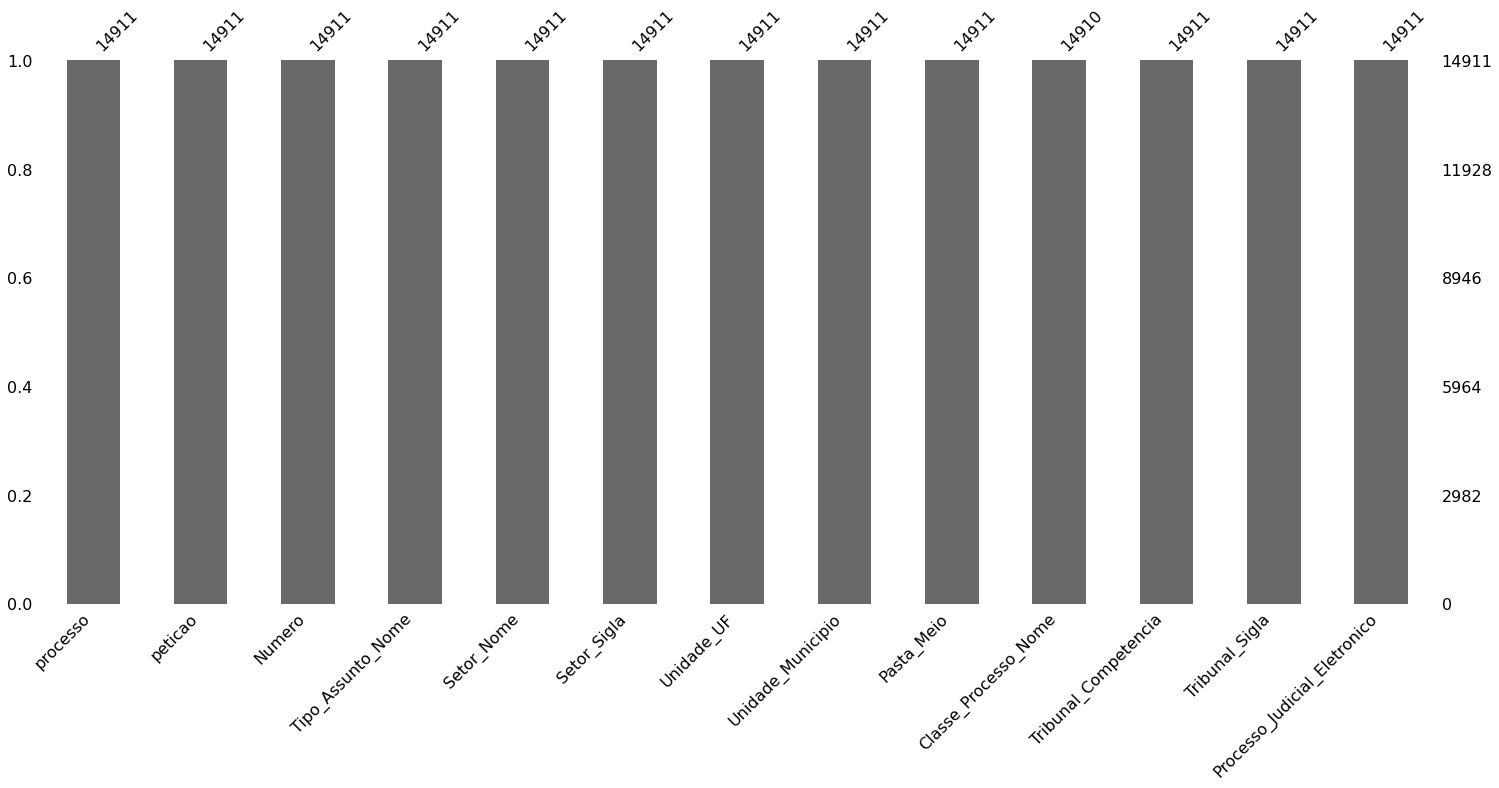

In [ ]:
# Importa biblioteca para visualização gráfica de dados faltantes
import missingno as msno
# Plota gráfico de barras do dataframe com a indicação da quantidade de dados existentes em cada linha
msno.bar(df_final)

In [ ]:
# Lista as linhas da coluna com dados faltantes
df_final.loc[df_final['Classe_Processo_Nome'].isna()]

,processo,peticao,Numero,Tipo_Assunto_Nome,Setor_Nome,Setor_Sigla,Unidade_UF,Unidade_Municipio,Pasta_Meio,Classe_Processo_Nome,Tribunal_Competencia,Tribunal_Sigla,Processo_Judicial_Eletronico
11409,10126865320214013800,"Em anexo, inicial e documentos\n \nNum. 482023...",10126865320214013800,MULTAS E DEMAIS SANÇÕES,COORDENAÇÃO REGIONAL DE RECUPERAÇÃO DE ATIVOS ...,CORAT1R,DF,BRASÍLIA,ELETRÔNICO,NaN,Justiça Federal Comum,TRF1,True


In [ ]:
# Exclusão da linha com dado faltante
df_final = df_final.drop(index=11409, axis=0)
print(df_final.shape)
df_final.iloc[11409:11409,:]

(14910, 13)


,processo,peticao,Numero,Tipo_Assunto_Nome,Setor_Nome,Setor_Sigla,Unidade_UF,Unidade_Municipio,Pasta_Meio,Classe_Processo_Nome,Tribunal_Competencia,Tribunal_Sigla,Processo_Judicial_Eletronico


In [ ]:
df_final = df_final.drop(columns=['processo','Numero','Setor_Nome','Unidade_UF','Unidade_Municipio','Pasta_Meio','Tribunal_Competencia','Tribunal_Sigla','Processo_Judicial_Eletronico'], axis=1)
df_final

,peticao,Tipo_Assunto_Nome,Setor_Sigla,Classe_Processo_Nome
0,Petição segue anexa.\n \nNum. 751512049 - Pág....,AVERBAÇÃO / CONTAGEM DE TEMPO ESPECIAL,COREJEF1R,RECURSO INOMINADO
1,9254-20.2010.4.01.3803 \nEXMO (A) SR (A) JUIZ ...,FORNECIMENTO DE MEDICAMENTOS,CORESA1R,RECURSO INOMINADO
2,Dados sobre a doença e medicamento(s)/exame(s)...,PADRONIZADO,CORESA1R,RECURSO INOMINADO
3,inicial\n \nNum. 409309388 - Pág. 1Assinado el...,SEGURO-DESEMPREGO,COREJEF1R,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL
4,INICIAL\n \nNum. 409362388 - Pág. 1Assinado el...,SEGURO-DESEMPREGO,COREJEF1R,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL
...,...,...,...,...
15040,Petição recebida e distribuída nesta seção con...,PADRONIZADO,CORESA1R,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL
15041,Petição recebida e distribuída nesta seção con...,PADRONIZADO,CORESA1R,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL
15042,Segue inicial e documentos.\n \nNum. 751565069...,EXAME DE SAÚDE E/OU APTIDÃO FÍSICA,CORESP1R,MANDADO DE SEGURANÇA
15043,INICIAL\n \nNum. 752882994 - Pág. 1Assinado el...,SEGURO-DESEMPREGO,COREJEF1R,PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL


In [ ]:
df_final['Classe_Processo_Nome'].value_counts()

PROCEDIMENTO DO JUIZADO ESPECIAL CÍVEL                    11272
PROCEDIMENTO ORDINÁRIO                                     1381
MANDADO DE SEGURANÇA                                        920
RECURSO INOMINADO                                           586
CUMPRIMENTO DE SENTENÇA CONTRA A FAZENDA PÚBLICA            208
AÇÃO CIVIL PÚBLICA                                          179
EXECUÇÃO DE TÍTULO EXTRAJUDICIAL                             69
CUMPRIMENTO PROVISÓRIO DE SENTENÇA                           51
CUMPRIMENTO DE SENTENÇA                                      44
PETIÇÃO                                                      26
TUTELA ANTECIPADA ANTECEDENTE                                25
AÇÃO CIVIL DE IMPROBIDADE ADMINISTRATIVA                     16
EMBARGOS À EXECUÇÃO                                          15
AÇÃO POPULAR                                                 13
EMBARGOS DE TERCEIRO                                         12
REINTEGRAÇÃO / MANUTENÇÃO DE POSSE      

In [ ]:
df_final['Setor_Sigla'].value_counts()

COREJEF1R     9472
CORESA1R      2457
CORESP1R      1266
COREJEFAE      634
CORESE1R       394
CGJ            205
COREM1R        124
CORAT1R         94
CRN1R           80
COREPAM1R       79
SEJUD1R         63
COREPRO1R       19
CORAD1R          8
GAB1R            7
CGJNINF          6
CORETRAB1R       2
Name: Setor_Sigla, dtype: int64

In [ ]:
# Exclusão de linhas referentes a Coordenações não relevantes para o modelo
for setor in ['CGJ', 'CRN1R','CORETRAB', 'CGJNIN', 'GAB1', 'CORAD1', 'SEJUD1', 'COREPRO1']:  
  filt = df_final[df_final['Setor_Sigla'].str.contains(setor)]
  df_final = df_final.drop(index=filt.index, axis=0)
df_final['Setor_Sigla'].value_counts()

COREJEF1R    10106
CORESA1R      2457
CORESP1R      1266
CORESE1R       394
COREM1R        124
CORAT1R         94
COREPAM1R       79
Name: Setor_Sigla, dtype: int64

In [ ]:
df_final['Setor_Sigla'] = df_final['Setor_Sigla'].str.replace('COREJEFAE', 'COREJEF1R')

df_final['Setor_Sigla'].value_counts()

COREJEF1R    10106
CORESA1R      2457
CORESP1R      1266
CORESE1R       394
COREM1R        124
CORAT1R         94
COREPAM1R       79
Name: Setor_Sigla, dtype: int64

### VERIFICAÇÃO DO BALANCEAMENTO DA VARIÁVEL TARGET

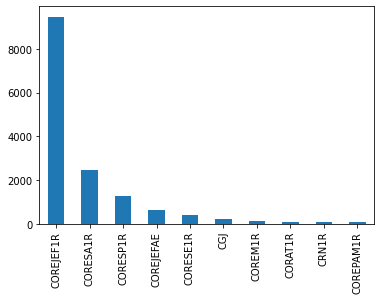

In [ ]:
# Plota gráfico de barras com a quantidade de classes da variável target
df_final['Setor_Sigla'].value_counts().plot(kind='bar')

### GRAVA O DATAFRAME EM ARQUIVO

In [ ]:
df_final.to_parquet(pasta_projeto / 'AU final.parquet')